In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np

data = []
for line in open("dataCircle.txt").readlines():
    data.append(line.split())
data_ = []
for element in data:
    tmp = []
    for number in element:
        tmp.append(float(number))
    data_.append(tmp)
data = np.array(data_)


In [2]:
features = data[:,0:2]
labels = data[:,2]

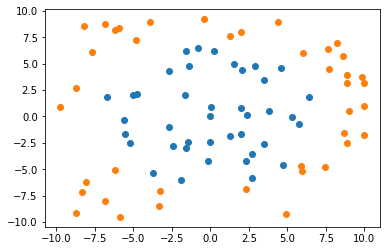

In [4]:
import matplotlib.pyplot as plt

plt.plot(features[0:40,0],features[0:40,1], 'o')
plt.plot(features[40:80,0],features[40:80,1], 'o')

In [28]:

class WeakLearner():
    
    def __init__(self, weights, coordinate=0, direction='vertical'):
        self.dir = direction
        self.coord = coordinate
        self.par = 1
        self.weights = weights

    def evaluate(self, x):
        if self.dir == 'vertical':
            if x[0]*self.par <= self.par*self.coord:
                return 1
            else:
                return -1
        elif self.dir == 'horizontal':
            if x[1]*self.par <= self.par*self.coord:
                return 1
            else:
                return -1
        else:
            print('Bad direction')
            return 0
    def update_weights(self, weights):
        self.weights = weights
    
    def get_error(self, X, y):
        error_tmp = 0
        
        for i in range(X.shape[0]):
            if self.evaluate(X[i]) != y[i]:
                error_tmp += self.weights[i]
        return error_tmp

    def train(self, X, y, interval=0.1, start=-10, stop=10):
        #check if direction correct
        if self.evaluate(X[0]) == 0:
            return -1
        #define error_list
        error_list = []
        grid = np.arange(start, stop, interval)
        
        for i in range(0,grid.shape[0]):
            self.coord = grid[i]
            error_tmp = self.get_error(X, y)
            if error_tmp > 0.5:
                error_list.append(1-error_tmp)
            else:
                error_list.append(error_tmp)
        min_error_index = error_list.index(min(error_list))
        self.coord = grid[min_error_index]
        
        error = self.get_error(X, y)
        #print(self.coord)
        if error > 0.5:
            self.par *= -1
            return 1-error
        else:
            return error
    
    def draw(self, index):
        if self.dir == 'vertical':
            plt.plot(np.ones((100))*self.coord, np.arange(-10,10,0.2), label=str(index))
        else:
            plt.plot(np.arange(-10,10,0.2), np.ones((100))*self.coord, label=str(index))
        
    def print_coord(self):
        print(np.round(self.coord,2))

In [7]:
#prepare train and test data
train_feat = features[0:102]
train_labels = labels[0:102]

In [8]:
def find_optimal_learner(weights, learner_list, X, y):
    error_list = []
    for learner in learner_list:
        learner.update_weights(weights)
        learner.train(X, y)
        error_list.append(learner.get_error(X, y))
        #print(error_list)
    return [min(error_list),error_list.index(min(error_list))]

4.7
-10.0
-5.8
-10.0
6.5
-10.0
5.8
-4.7
-10.0
5.0
-6.2
-10.0
6.4
-10.0
-5.8
-10.0
-6.2
-10.0
6.5
-10.0
5.8
-10.0
-6.2
-10.0
-6.8
-10.0
6.5
-10.0
6.4
-10.0


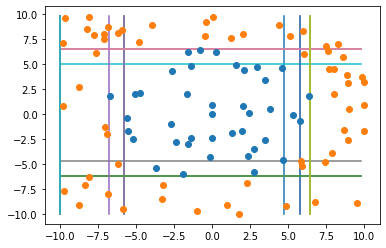

In [29]:
N=30 #number of final learners

weights = np.ones(train_feat.shape[0])*(1/train_feat.shape[0]) #weight initialization
#weak_learner init
learner_list = [WeakLearner(weights), WeakLearner(weights, direction='horizontal')]

strong_learner_list = []
alpha_list = []
oldindex = -1
for t in range(0,N):
    error,index = find_optimal_learner(weights, learner_list, train_feat, train_labels)
    #if index == oldindex:
    #index = 1-index
    #oldindex = index
    alpha = 0.5*np.log((1-error)/error)
    optimal_learner = learner_list[index]
    #optimal_learner.update_weights(weights)
    #optimal_learner.train(train_feat, train_labels)
    optimal_learner.draw(t)
    #optimal_learner.print_coord()
    strong_learner_list.append(optimal_learner)
    alpha_list.append(alpha)
    #print(np.round(alpha,2))
    #print(error)
    #print(index)
    Z = 0
    for i in range(0,train_labels.shape[0]):
        weights[i] = weights[i]*np.exp(-alpha*train_labels[i]*optimal_learner.evaluate(train_feat[i]))
        Z += weights[i]
    weights = weights/Z
plt.plot(features[0:40,0],features[0:40,1], 'o')
plt.plot(features[40:102,0],features[40:102,1], 'o')
#plt.legend()
plt.savefig('Graph.pdf', format='pdf')

In [16]:
def accuracy_strong(alpha_list, strong_learner_list, X, y):
    error = 0
    for j in range(0,y.shape[0]):
        sum = 0
        for i in range(0,np.array(alpha_list).shape[0]):
            sum += alpha_list[i]*strong_learner_list[i].evaluate(X[j])
        if np.sign(sum) != y[j]:
            error += (1/y.shape[0])
    return 1-error

In [22]:
print(accuracy_strong(alpha_list, strong_learner_list, train_feat, train_labels))

0.6078431372549018
